<a href="https://colab.research.google.com/github/zainabbas313/MACHINE-LEARNING-MODEL-TRAINING/blob/main/MODEL_TRAIN_kc_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from google.colab import drive
import tensorflow as tf



In [ ]:
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tf.config.list_physical_devices('GPU')

[]

# DATA LOADING

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/MACHINE LEARNING/TENSORFLOW BOOTCAMP/DATASET/kc_house_data.csv')

In [ ]:
df.shape

(21613, 21)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# DATA CLEANING

### HANDLE MISSING VALUES

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.drop(['id'], axis = 1, inplace = True)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
# df['data'] = df['date'][1].year

<Axes: xlabel='month', ylabel='price'>

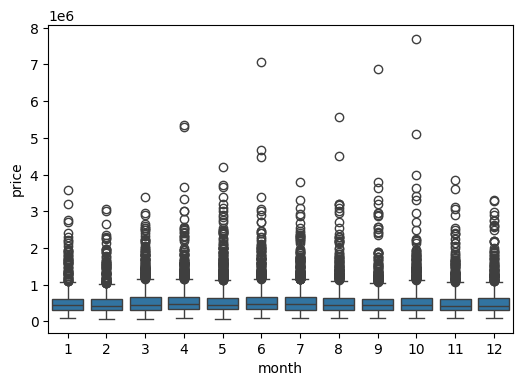

In [ ]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'month', y = 'price', data = df)

In [ ]:
df.drop(['date'], axis = 1, inplace = True)

In [ ]:
df.groupby('month').mean()['price']

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

### HANDLING OUTLIARS

In [ ]:
df1 = df.copy()

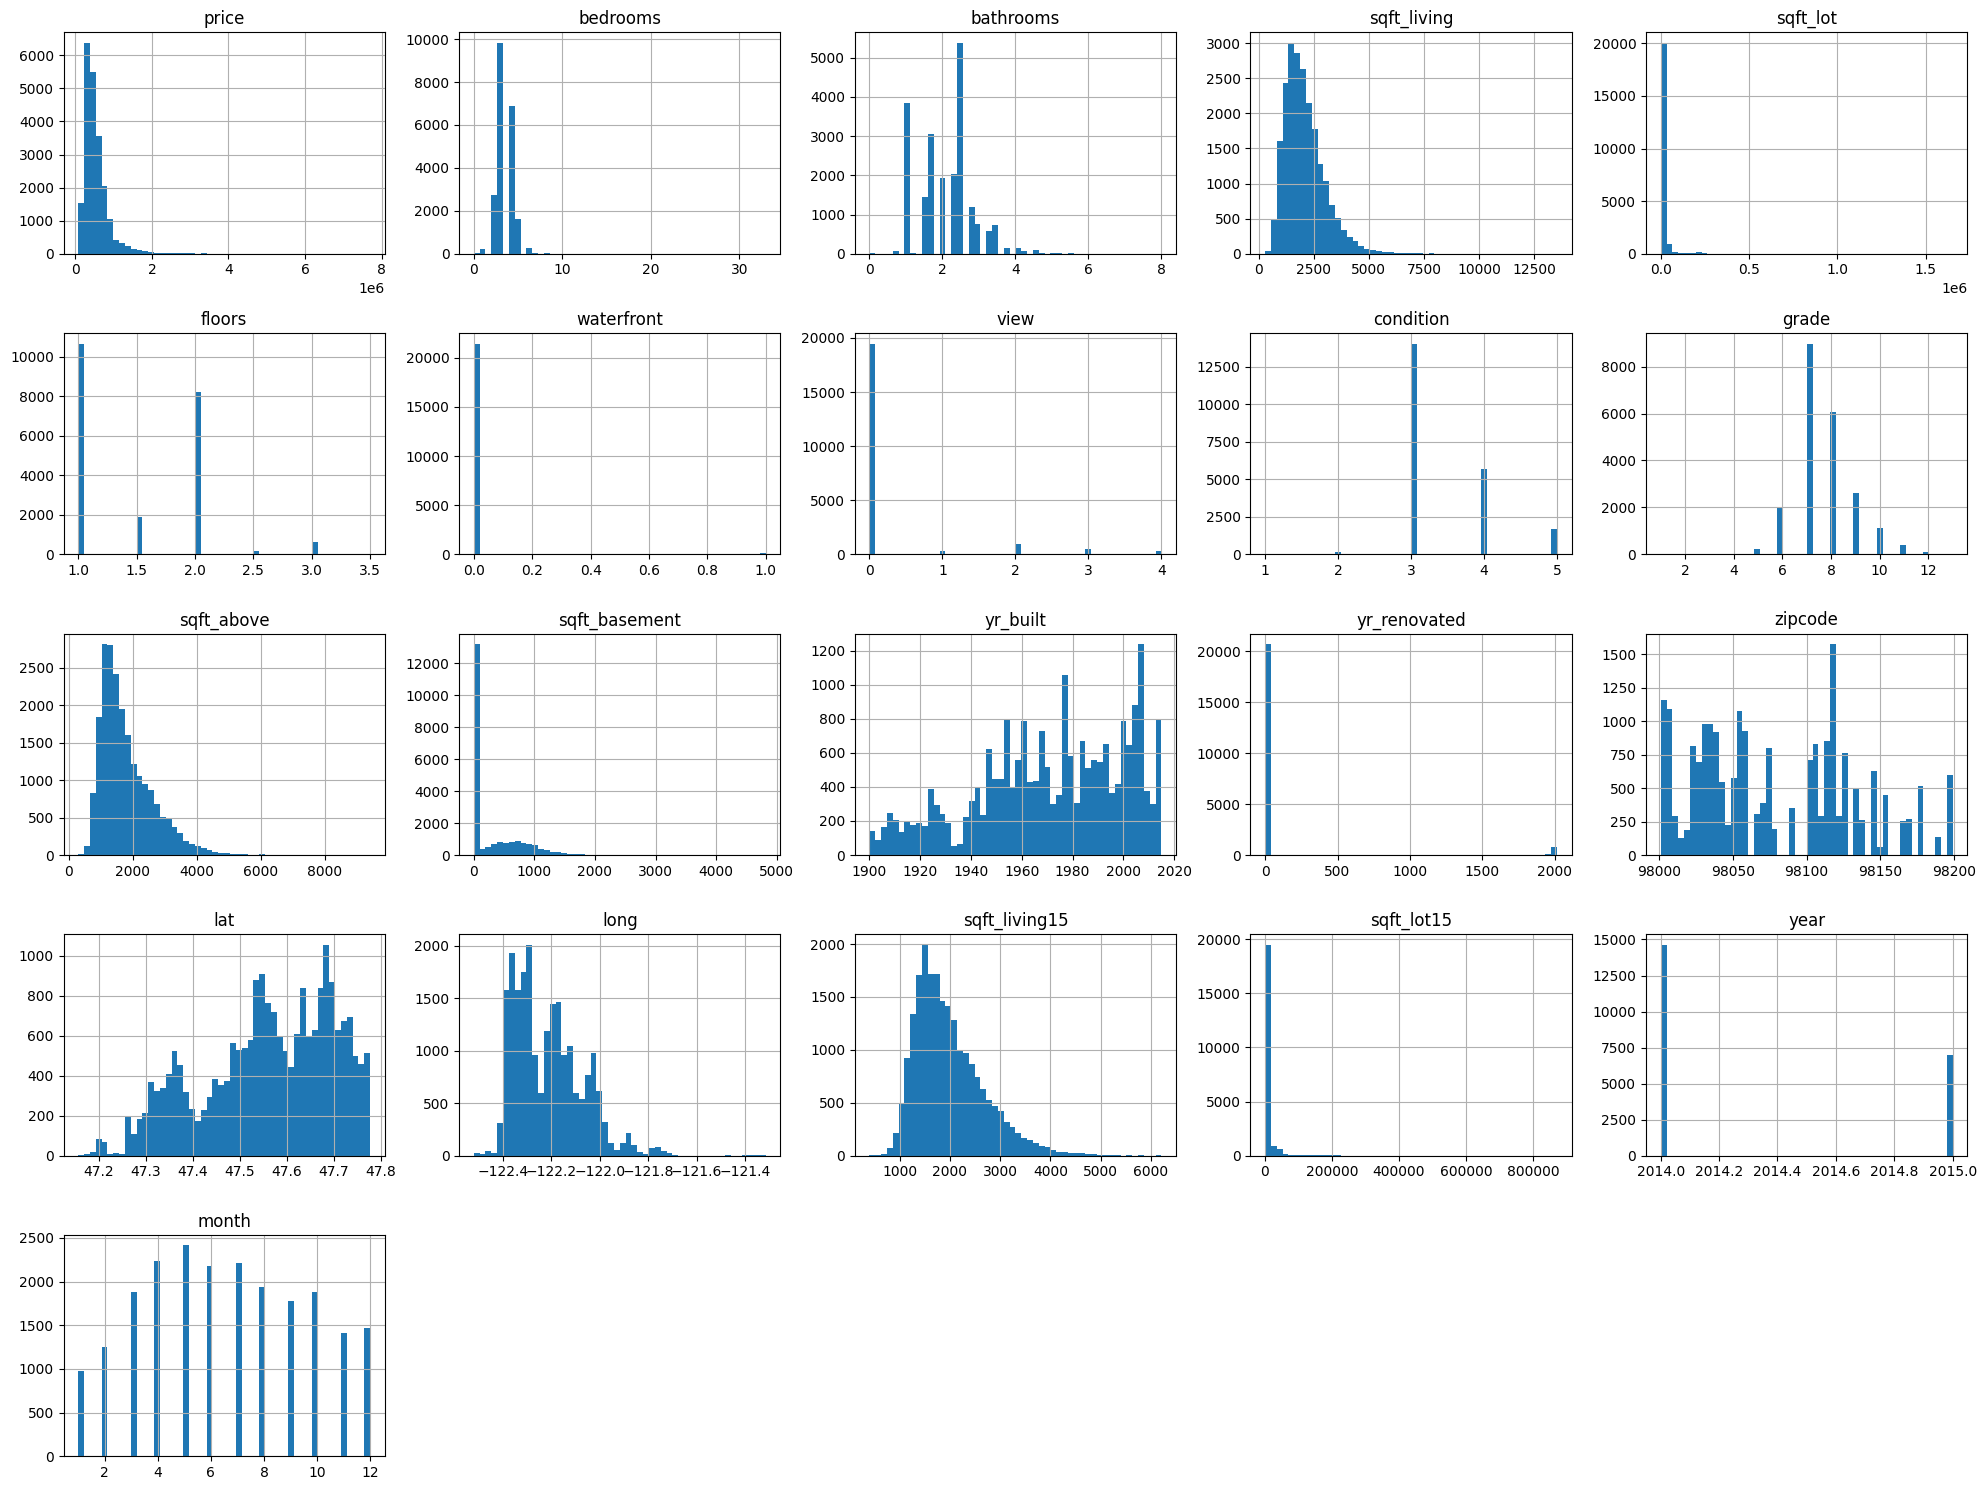

In [ ]:
df.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [ ]:
df.shape

(21613, 21)

In [ ]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [ ]:
# df1.drop(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
#        'sqft_basement', 'sqft_lot15'], axis = 1, inplace = True)
# df1.drop(['floors','waterfront', 'view', 'condition', 'grade',  'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
#        'sqft_living15', 'year', 'month'], axis = 1, inplace = True)

In [ ]:
print(df.shape)
print(df1.shape)

(21613, 21)
(21613, 21)


In [ ]:
Q1 = df.quantile(0)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1
df_iqr = df1[~((df1 < (Q1 - 1.5*IQR)) | (df1 > (Q3 + 1.5*IQR))).any(axis=1)]

In [ ]:
df_iqr.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,...,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,6


In [ ]:
print(df.shape)
print(df_iqr.shape)

(21613, 21)
(17875, 21)


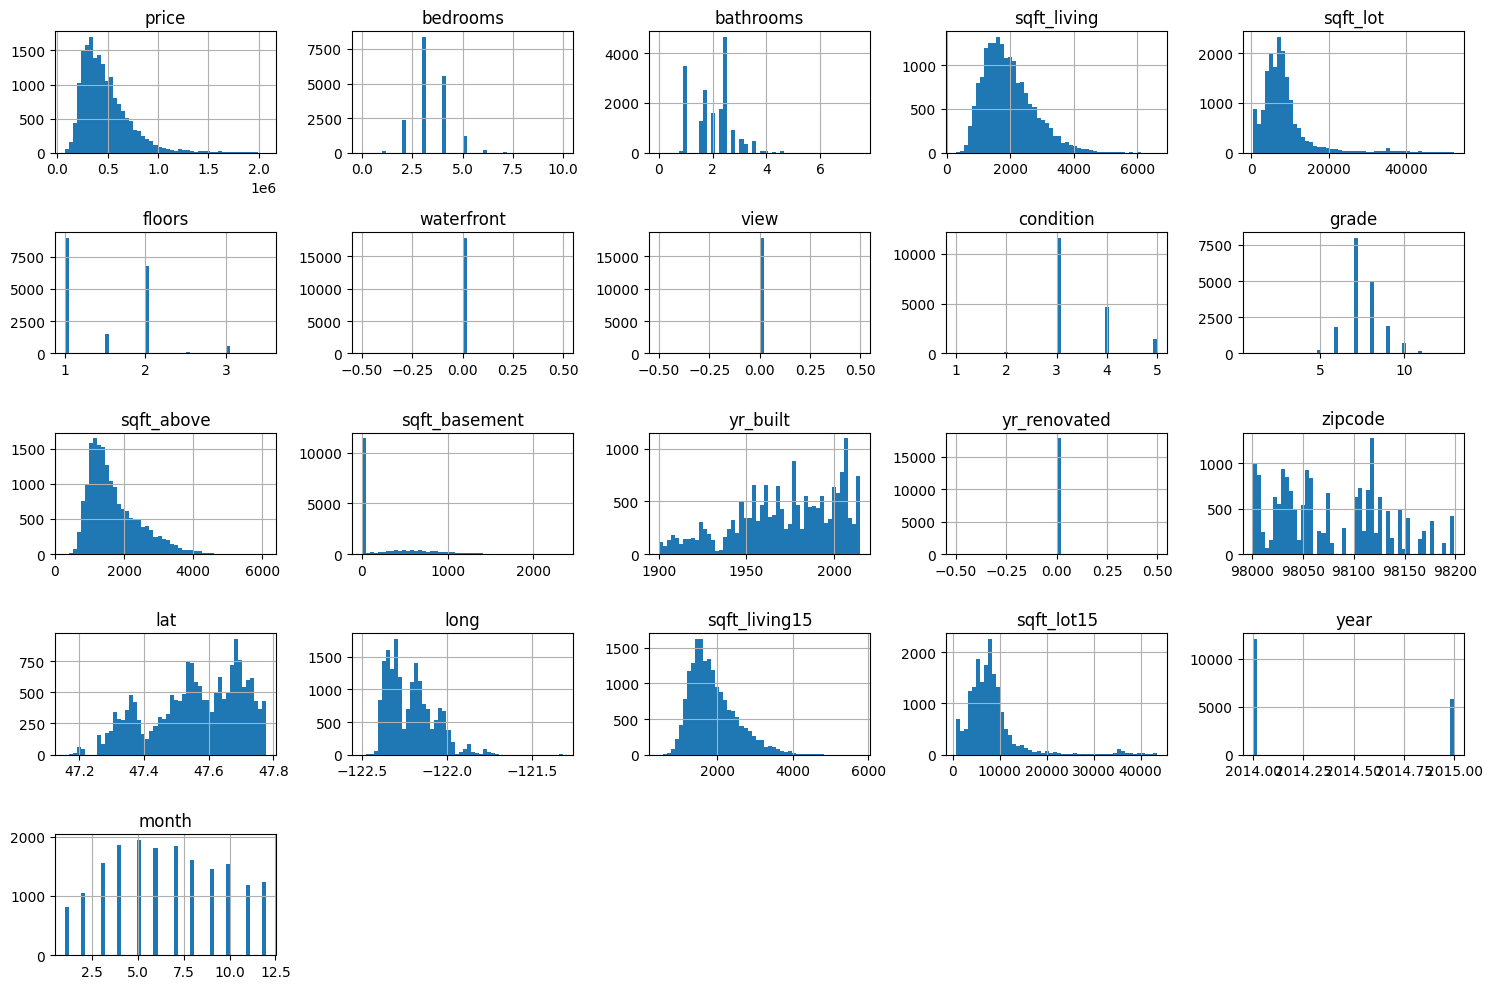

In [ ]:
df_iqr.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
df_iqr.shape

(17875, 21)

# EDA

<Axes: xlabel='price', ylabel='Density'>

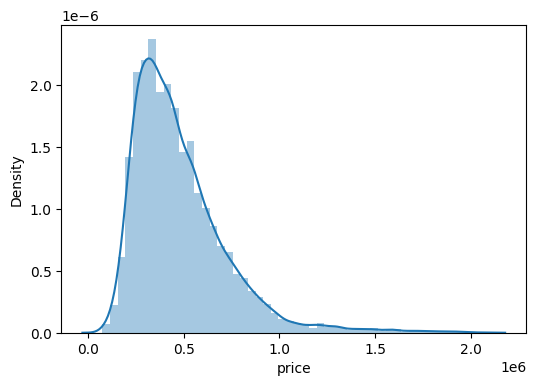

In [ ]:
plt.figure(figsize = (6,4))
sns.distplot(df_iqr['price'])

In [ ]:
# plt.figure(figsize = (6,4))
# sns.countplot(df['bathrooms'])

In [ ]:
df_iqr.corr()['price'].sort_values()

zipcode         -0.072068
month           -0.011325
year             0.006489
condition        0.037253
long             0.073555
yr_built         0.092338
sqft_lot         0.131232
sqft_lot15       0.133632
sqft_basement    0.202535
floors           0.289055
bedrooms         0.326656
lat              0.407712
bathrooms        0.472868
sqft_living15    0.568094
sqft_above       0.577755
sqft_living      0.652079
grade            0.657339
price            1.000000
waterfront            NaN
view                  NaN
yr_renovated          NaN
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

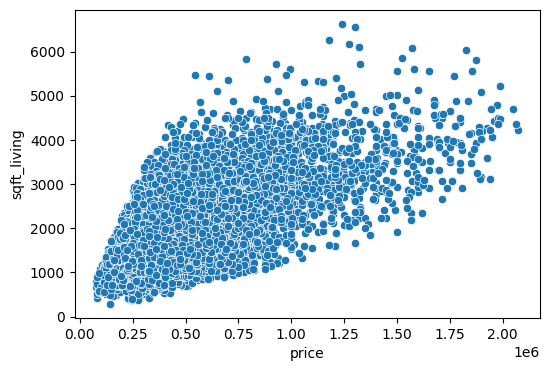

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'price', y = 'sqft_living', data = df_iqr)

<Axes: xlabel='bedrooms', ylabel='price'>

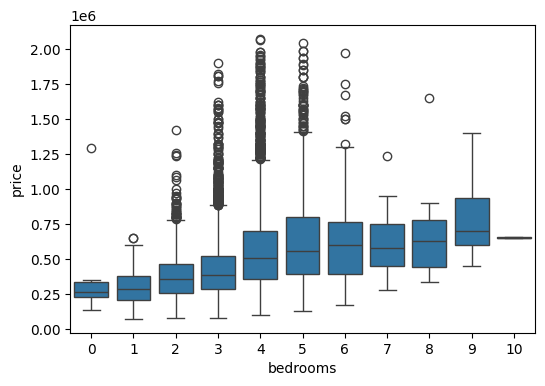

In [ ]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'bedrooms', y = 'price', data = df_iqr)

<Axes: xlabel='price', ylabel='long'>

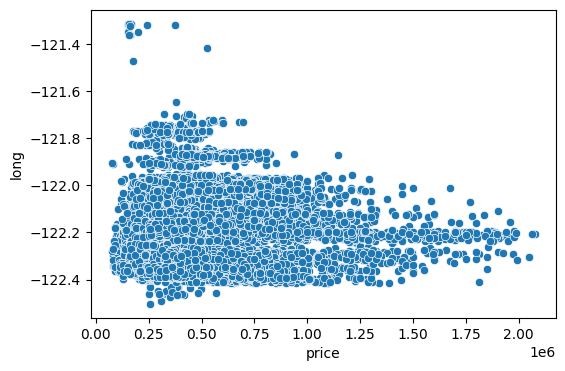

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'price', y = 'long', data = df_iqr)

<Axes: xlabel='price', ylabel='lat'>

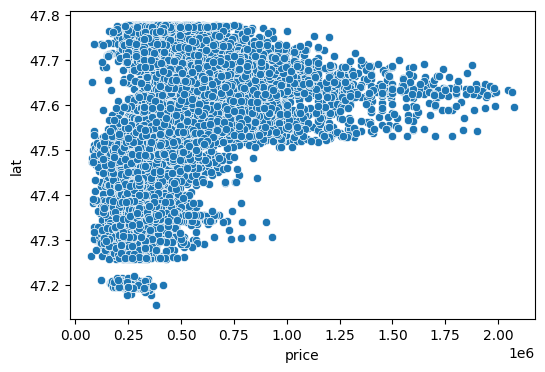

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'price', y = 'lat', data = df_iqr)

<Axes: xlabel='long', ylabel='lat'>

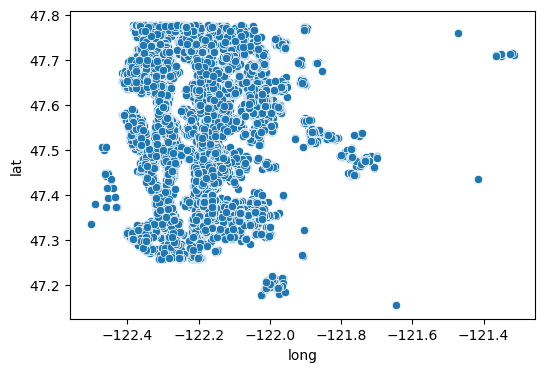

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'long', y = 'lat', data = df_iqr)

<Axes: xlabel='long', ylabel='lat'>

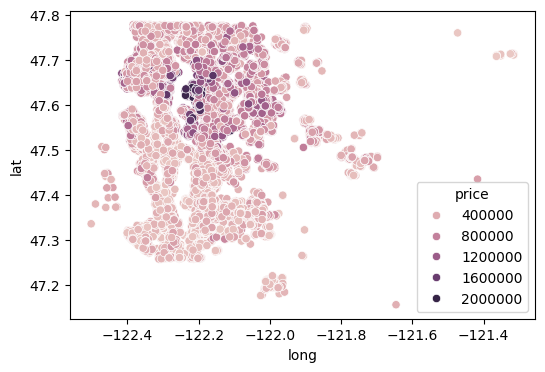

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'long', y = 'lat', data = df_iqr, hue = 'price')

In [ ]:
df_iqr.sort_values('price', ascending = False).head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
3344,2075000.0,4,3.50,4230,20377,2.0,0,0,3,11,...,0,1997,0,98004,47.5954,-122.206,3980,20489,2014,6
21368,2065000.0,4,3.75,4350,7965,2.0,0,0,3,10,...,0,2013,0,98004,47.6289,-122.205,2190,8557,2014,6
4859,2048000.0,5,4.00,4690,8208,2.0,0,0,3,9,...,1650,1926,0,98112,47.6321,-122.304,3300,8001,2015,3
17995,1990000.0,5,3.00,4480,5000,2.5,0,0,5,12,...,1060,1902,0,98112,47.6275,-122.315,3220,5600,2014,6
21467,1987500.0,5,3.50,5230,8960,2.0,0,0,3,11,...,780,2014,0,98004,47.5964,-122.201,2310,9603,2014,12


In [ ]:
len(df_iqr)*0.01

178.75

In [ ]:
max_price = df_iqr.sort_values('price', ascending = False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

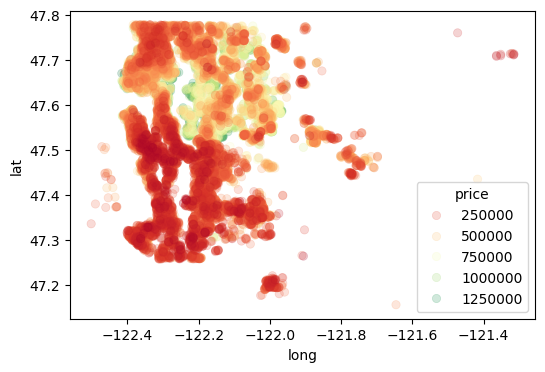

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'long', y = 'lat', edgecolor = None, alpha = 0.2, palette = 'RdYlGn',data = max_price, hue = 'price')

<Axes: xlabel='waterfront', ylabel='price'>

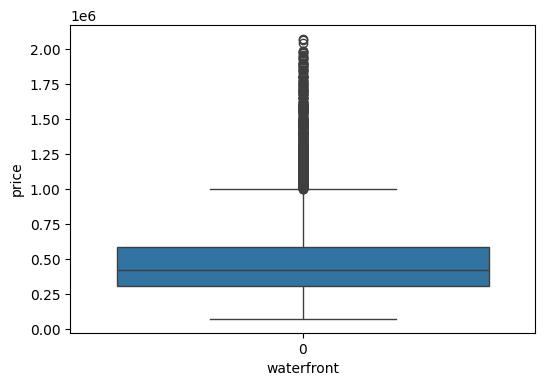

In [ ]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'waterfront', y = 'price', data = df_iqr)

# DATA PRE-PROCESSING

<Axes: xlabel='month'>

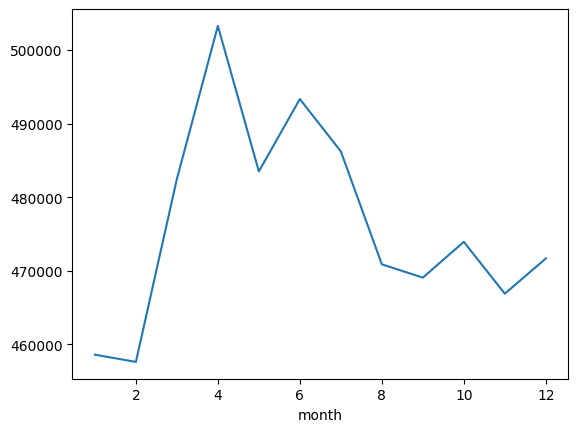

In [ ]:
df_iqr.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

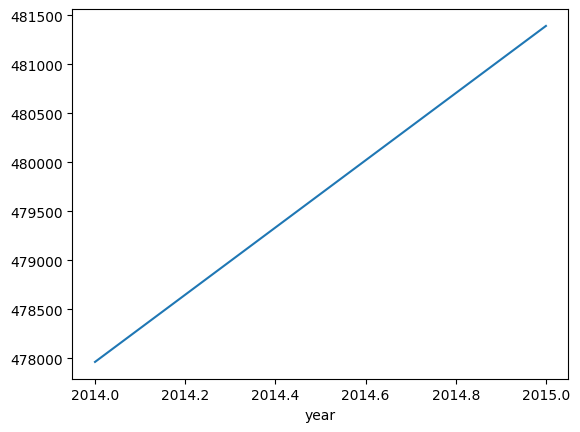

In [ ]:
df_iqr.groupby('year').mean()['price'].plot()

In [ ]:
len(df_iqr['zipcode'].value_counts()) # too many zipcode, need domain knowledge

70

In [ ]:
df_iqr.drop(['zipcode'], axis = 1, inplace = True)

In [ ]:
df_iqr['yr_renovated'].value_counts()

yr_renovated
0    17875
Name: count, dtype: int64

In [ ]:
df_iqr['sqft_basement'].value_counts()

sqft_basement
0       11421
700       181
600       175
500       175
400       157
        ...  
2220        1
792         1
2160        1
894         1
248         1
Name: count, Length: 241, dtype: int64

# FEATURE ENGINEERING / FEATURES SELECTION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x = df_iqr.drop(['price'], axis = 1)
y = df_iqr.price

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
random_forest_model = RandomForestRegressor()

sfs_linear = SFS(linear_model, n_features_to_select=15, direction='backward')
sfs_linear.fit(xtrain, ytrain)

sfs_rf = SFS(random_forest_model, n_features_to_select=15, direction='backward')
sfs_rf.fit(xtrain, ytrain)

selected_features_linear = sfs_linear.get_support(indices=True)
selected_features_rf = sfs_rf.get_support(indices=True)

print("Selected features (Linear Regression):", selected_features_linear)
print("Selected features (Random Forest Regressor):", selected_features_rf)

Selected features (Linear Regression): [ 0  1  2  3  4  7  8  9 11 12 13 14 15 16 17]
Selected features (Random Forest Regressor): [ 0  1  2  4  5  6  7  8 10 12 13 14 15 16 17]


In [ ]:
df_selected = df.iloc[:, selected_features_rf]

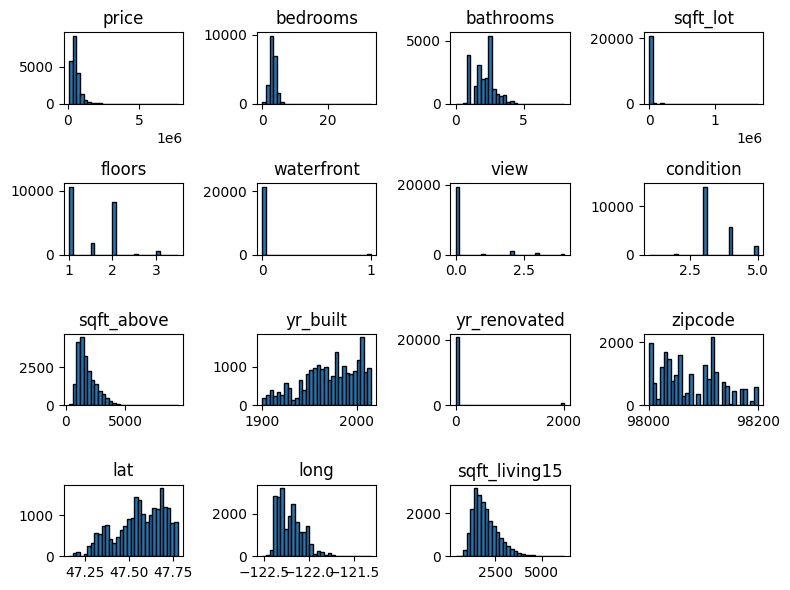

In [ ]:
df_selected.hist(bins=30, figsize=(8, 6), grid=False, edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
for col in df_selected.columns:
  print(f'{col} == > {np.min(df_selected[col])}')

price == > 75000.0
bedrooms == > 0
bathrooms == > 0.0
sqft_lot == > 520
floors == > 1.0
waterfront == > 0
view == > 0
condition == > 1
sqft_above == > 290
yr_built == > 1900
yr_renovated == > 0
zipcode == > 98001
lat == > 47.1559
long == > -122.519
sqft_living15 == > 399


In [ ]:
df_transform = df_selected.copy()

In [ ]:
df_transform['price'] = np.log(df_selected['price'])
df_transform['sqft_lot'] = np.log(df_selected['sqft_lot'])
df_transform['sqft_above'] = np.log(df_selected['sqft_above'])
df_transform['sqft_living15'] = np.log(df_selected['sqft_living15'])
df_transform['waterfront'] = np.log(df_selected['waterfront']+0.0001)

In [ ]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method = 'yeo-johnson')

df_transform['bedrooms'] = power.fit_transform(df_selected['bedrooms'].values.reshape(-1, 1))
df_transform['bathrooms'] = power.fit_transform(df_selected['bathrooms'].values.reshape(-1, 1))
df_transform['view'] = power.fit_transform(df_selected['view'].values.reshape(-1, 1))

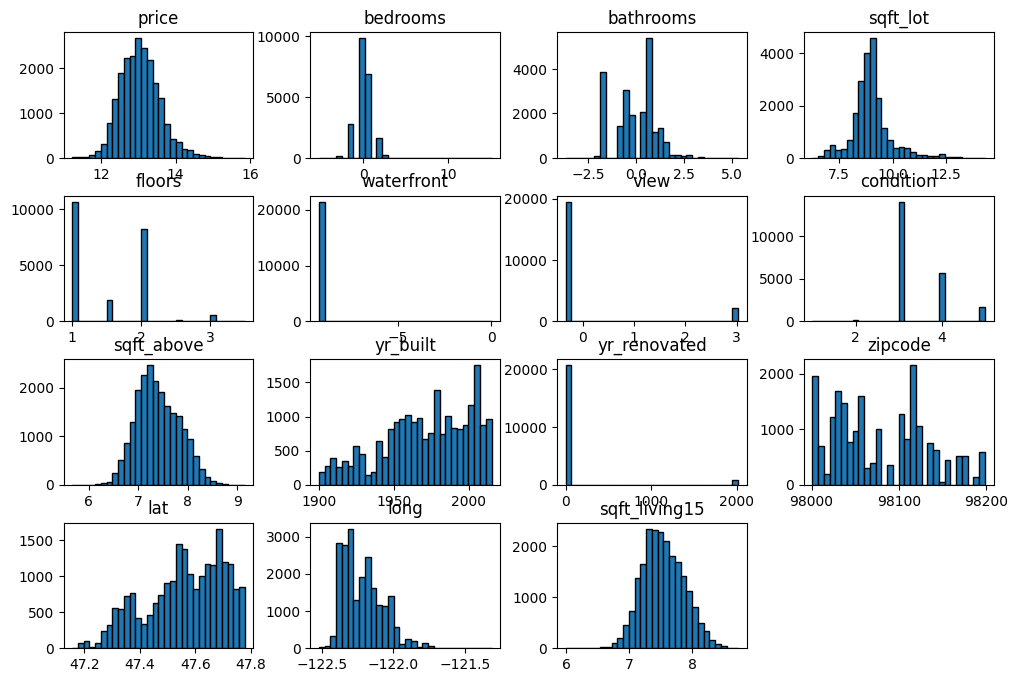

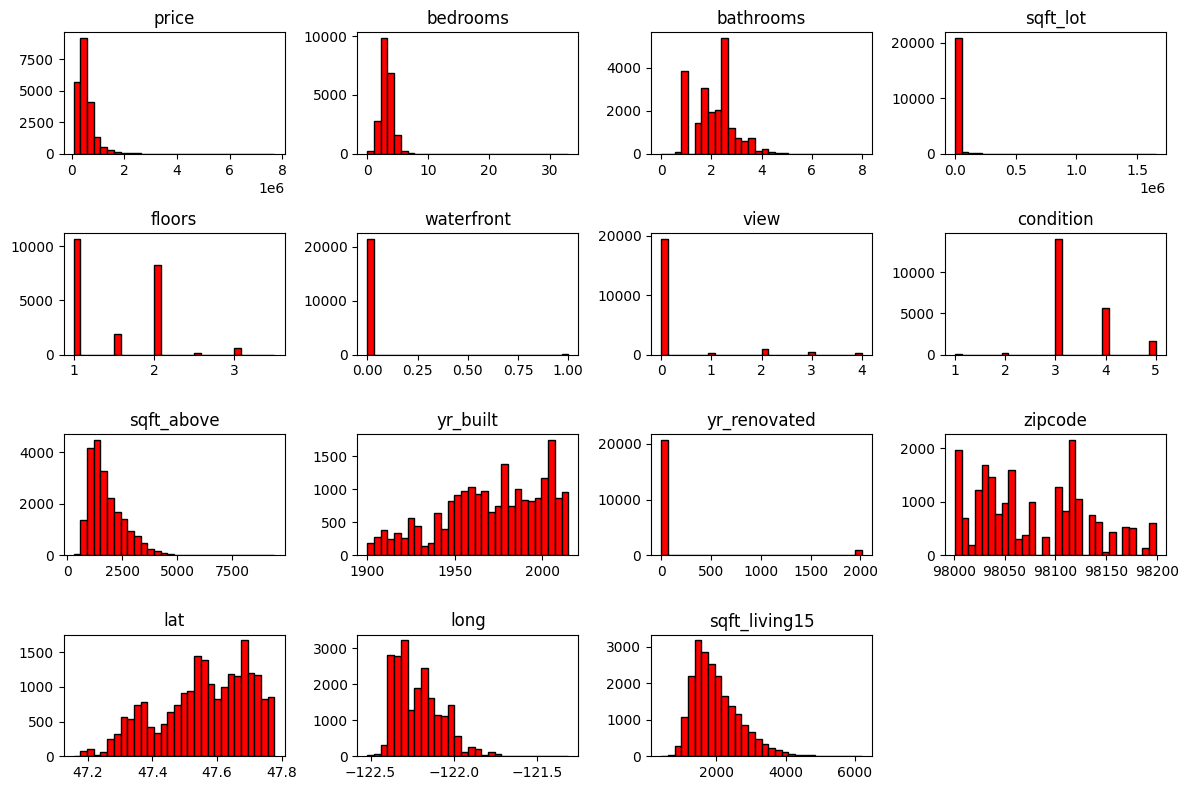

In [ ]:
df_transform.hist(bins = 30, figsize = (12,8), grid = False, edgecolor = 'black')
df_selected.hist(bins = 30, figsize = (12,8), grid = False, color = 'red',edgecolor = 'black')
plt.tight_layout()
plt.show()

# MODEL TRAINING

In [ ]:
x = df.drop(['price'], axis = 1)
y = df.price

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.3, random_state =42)

In [ ]:
xtrain.shape

(15129, 20)

### SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(xtrain)
X_test = scaler.transform(xtest)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### MODELLING

In [ ]:
model = Sequential()

model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))

model.add(Dense(1))

In [ ]:
from tensorflow.keras.metrics import Accuracy
model.compile(optimizer = 'adam', loss =  'mse', metrics=[Accuracy()])

In [ ]:
model.fit(x = xtrain, y = ytrain, validation_data = (xtest, ytest), batch_size = 128, epochs = 300)

Epoch 1/300
119/119 [==============================] - 2s 7ms/step - loss: 329520840704.0000 - accuracy: 0.0000e+00 - val_loss: 165358895104.0000 - val_accuracy: 0.0000e+00
Epoch 2/300
119/119 [==============================] - 1s 5ms/step - loss: 129150951424.0000 - accuracy: 0.0000e+00 - val_loss: 139677417472.0000 - val_accuracy: 0.0000e+00
Epoch 3/300
119/119 [==============================] - 1s 5ms/step - loss: 123496456192.0000 - accuracy: 0.0000e+00 - val_loss: 135236804608.0000 - val_accuracy: 0.0000e+00
Epoch 4/300
119/119 [==============================] - 0s 4ms/step - loss: 119992172544.0000 - accuracy: 0.0000e+00 - val_loss: 131194298368.0000 - val_accuracy: 0.0000e+00
Epoch 5/300
119/119 [==============================] - 1s 4ms/step - loss: 115918241792.0000 - accuracy: 0.0000e+00 - val_loss: 126058348544.0000 - val_accuracy: 0.0000e+00
Epoch 6/300
119/119 [==============================] - 1s 4ms/step - loss: 110518755328.0000 - accuracy: 0.0000e+00 - val_loss: 1191503

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

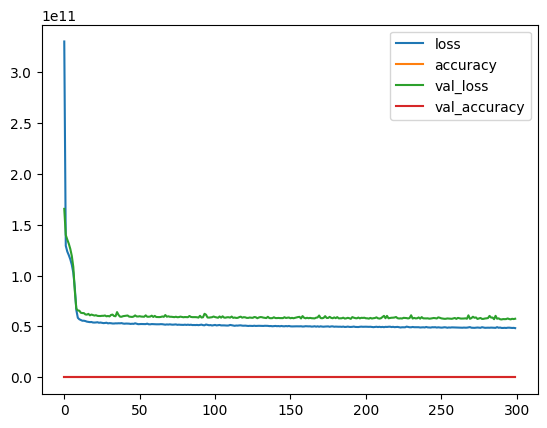

In [ ]:
losses.plot()

# MODEL EVALUATION

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [ ]:
predictions = model.predict(xtest)

203/203 [==============================] - 0s 1ms/step


In [ ]:
mean_squared_error(ytest, predictions)

57602041634.998245

In [ ]:
mean_absolute_error(ytest, predictions)

158975.84160529767

In [ ]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
explained_variance_score(ytest, predictions)

0.6037579202567007

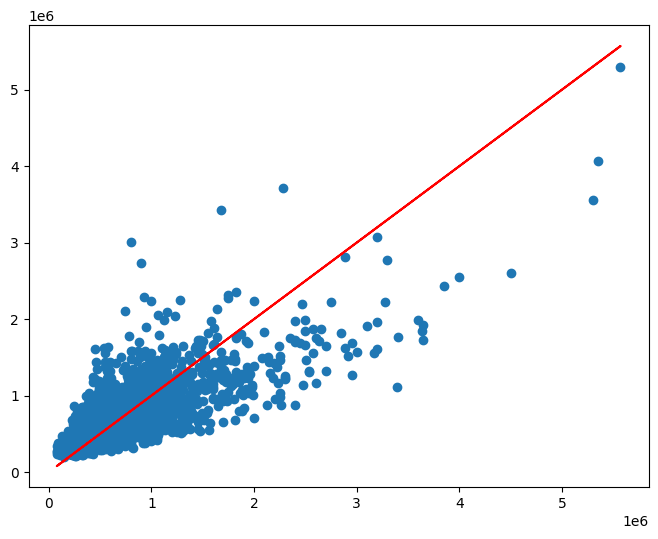

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test, 'r')

# TEST ON DIFFERENT SUPERVISED ALGORITHM

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_l = LinearRegression()

In [ ]:
x = df_transform.drop(['price'], axis = 1)
y = df_transform.price

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.3, random_state =42)

In [ ]:
model_l.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

pred = model_l.predict(xtest)

mae = mean_absolute_error(ytest, pred)
mse = mean_squared_error(ytest, pred)
rmse = sqrt(mse)
r2 = r2_score(ytest, pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 0.22147111526198413
Mean Squared Error: 0.08087084406138567
Root Mean Squared Error: 0.28437799503721395
R-squared: 0.713596587020974


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_r = RandomForestRegressor()

In [ ]:
model_r.fit(xtrain,ytrain)

RandomForestRegressor()

In [ ]:
pred = model_r.predict(xtest)

mae = mean_absolute_error(ytest, pred)
mse = mean_squared_error(ytest, pred)
rmse = sqrt(mse)
r2 = r2_score(ytest, pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 0.13557690327529148
Mean Squared Error: 0.03606258363528314
Root Mean Squared Error: 0.1899015103554554
R-squared: 0.8722846638505866
